In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('venmoSample.csv')

In [3]:
df.head()

,user1,user2,transaction_type,datetime,description,is_business,story_id
0,1218774,1528945,payment,2015-11-27 02:48:19,Uber,False,5657c473cd03c9af22cff874
1,5109483,4782303,payment,2015-06-17 04:37:04,Costco,False,5580f9702b64f70ab0114e94
2,4322148,3392963,payment,2015-06-19 00:05:31,Sweaty balls,False,55835ccb1a624b14ac62cef4
3,469894,1333620,charge,2016-06-03 16:34:13,🎥,False,5751b185cd03c9af224c0d17
4,2960727,3442373,payment,2016-05-29 16:23:42,⚡,False,574b178ecd03c9af22cf67f4


In [4]:
df.drop('is_business', axis=1, inplace=True)

In [5]:
df.drop('story_id', axis=1, inplace=True)

In [6]:
df.head()

,user1,user2,transaction_type,datetime,description
0,1218774,1528945,payment,2015-11-27 02:48:19,Uber
1,5109483,4782303,payment,2015-06-17 04:37:04,Costco
2,4322148,3392963,payment,2015-06-19 00:05:31,Sweaty balls
3,469894,1333620,charge,2016-06-03 16:34:13,🎥
4,2960727,3442373,payment,2016-05-29 16:23:42,⚡


Total Number of Transactions

In [7]:
df['user2'].count()

7090241

Converting Time Str to an accessible format 

In [140]:
df['datetime'] = pd.to_datetime(df['datetime'])

In [141]:
df['Hour'] = df['datetime'].apply(lambda time: time.hour)
df['Month'] = df['datetime'].apply(lambda time: time.month)
df['Day of Week'] = df['datetime'].apply(lambda time: time.dayofweek)
df['Year'] = df['datetime'].apply(lambda time: time.year)

In [142]:
dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}
df['Day of Week'] = df['Day of Week'].map(dmap)

In [143]:
df.head()

,user1,user2,transaction_type,datetime,description,Hour,Month,Day of Week,Year
0,1218774,1528945,payment,2015-11-27 02:48:19,Uber,2,11,Fri,2015
1,5109483,4782303,payment,2015-06-17 04:37:04,Costco,4,6,Wed,2015
2,4322148,3392963,payment,2015-06-19 00:05:31,Sweaty balls,0,6,Fri,2015
3,469894,1333620,charge,2016-06-03 16:34:13,🎥,16,6,Fri,2016
4,2960727,3442373,payment,2016-05-29 16:23:42,⚡,16,5,Sun,2016


Insight 1 -Analyzing # of transactions with respect to time(day of week, month, and hour)

Text(0.5, 1.0, 'Ratio of Payments to Charges per Day')

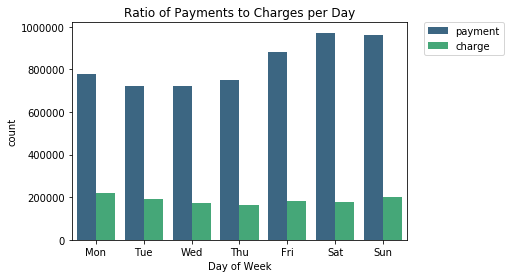

In [144]:
day_order = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
sns.countplot(x='Day of Week',data=df,hue='transaction_type',palette='viridis', order = day_order)

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title('Ratio of Payments to Charges per Day')

Text(0.5, 1.0, 'Ratio of Payments to Charges per Month')

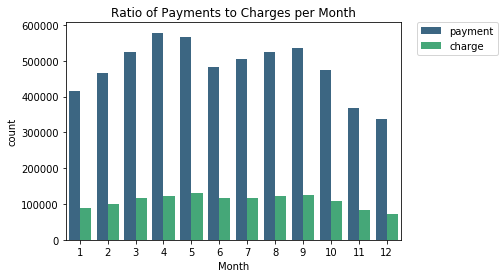

In [145]:
sns.countplot(x='Month',data=df,hue='transaction_type',palette='viridis')

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title('Ratio of Payments to Charges per Month')

Text(0.5, 1.0, 'Total Number of Transactions(Days)')

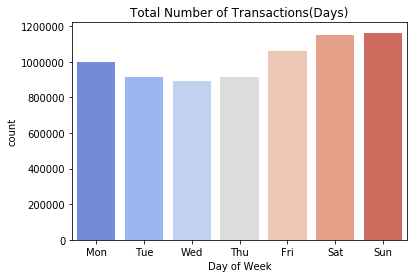

In [146]:
day_order = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
sns.countplot(x='Day of Week',data=df,palette='coolwarm', order=day_order)
plt.title('Total Number of Transactions(Days)')

Text(0.5, 1.0, 'Total Number of Transactions(Months)')

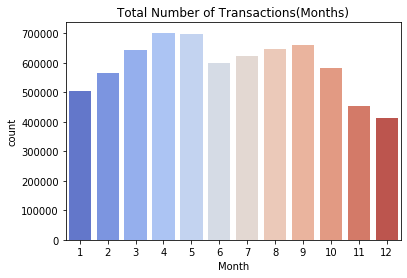

In [147]:
sns.countplot(x='Month',data=df,palette='coolwarm')
plt.title('Total Number of Transactions(Months)')

Text(0.5, 1.0, 'Total Number of Transactions(Hours)')

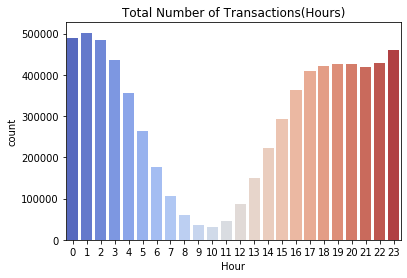

In [148]:
sns.countplot(x='Hour',data=df,palette='coolwarm')
plt.title('Total Number of Transactions(Hours)')

Heatmap for time vs # of transactions 

In [149]:
Hour_day = df.groupby(by=['Day of Week','Hour']).count()['transaction_type'].unstack()
Hour_day.head(7)

Hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
Day of Week,,,,,,,,,,,,,,,,,,,,,
Fri,65284,69739,68452,61653,50523,37647,24682,15440,8767,5405,...,37778,47163,55978,62365,62826,63349,64074,62803,64486,71022
Mon,78432,74295,68731,58758,44924,30733,18875,10668,5808,3564,...,36611,46398,55691,60092,59702,59820,58673,57173,57911,61893
Sat,76109,79152,78295,72301,63948,51430,36570,23552,14240,8296,...,26467,39573,51677,61931,68655,71241,72326,71523,72408,75604
Sun,78794,79382,78187,73118,63964,51546,37199,24374,15089,8691,...,24874,38480,52670,64243,70868,73440,73817,73318,74563,78460
Thu,62256,66045,64022,56527,44575,31901,20112,11689,6112,3643,...,31561,39935,48253,52797,52280,53469,53409,52298,55029,59789
Tue,66221,67687,64237,56995,43612,30458,18777,10447,5367,3137,...,33261,41755,49829,54588,53610,53420,52632,51240,51695,56119
Wed,62168,65642,63169,55592,44272,30994,19243,11022,5836,3368,...,30826,39198,47939,52330,52111,52184,52073,50635,52065,56376


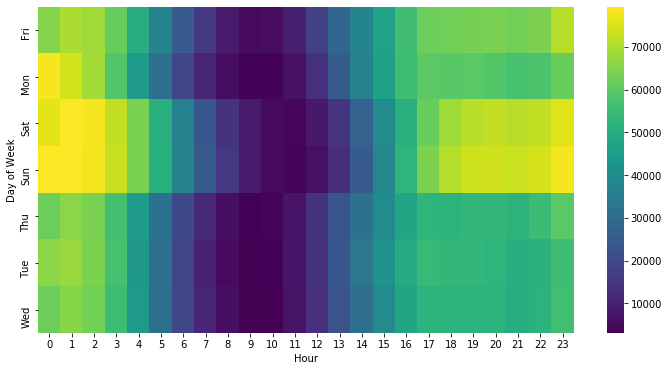

In [150]:
plt.figure(figsize=(12,6))
sns.heatmap(Hour_day,cmap='viridis')

In [151]:
Month_day =  df.groupby(by=['Day of Week','Month']).count()['transaction_type'].unstack()
Month_day.head()

Month,1,2,3,4,5,6,7,8,9,10,11,12
Day of Week,,,,,,,,,,,,
Fri,84323,83032,87176,117817,103986,82763,104805,89033,104313,93475,59455,50665
Mon,65350,95948,85029,88102,101969,84939,78477,103268,89426,76505,72325,56154
Sat,92485,92660,93394,122902,107534,91559,105557,104270,101722,107509,72371,55856
Sun,90696,97977,100127,103947,122048,91643,107604,106479,102071,94965,86955,58649
Thu,59569,66547,96115,92584,84193,86359,76442,73526,89051,79445,51322,59236


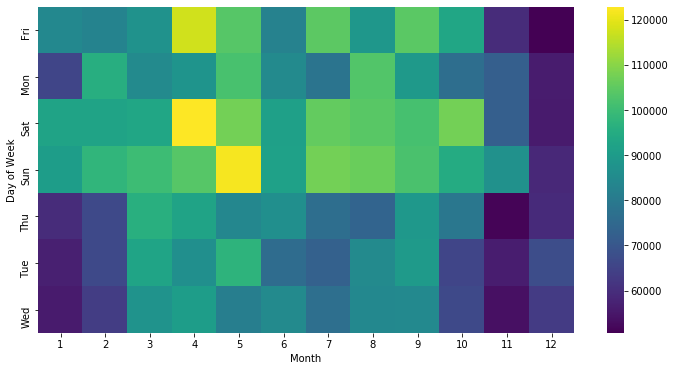

In [152]:
plt.figure(figsize=(12,6))
sns.heatmap(Month_day,cmap='viridis')

Confirming that we are getting the correct data for our heatmap 

In [20]:
df[(df['Month'] == 1) & (df['Day of Week']=='Fri')].count()

user1               84323
user2               84323
transaction_type    84323
datetime            84323
description         84321
Hour                84323
Month               84323
Day of Week         84323
dtype: int64

Month to hour heatmap

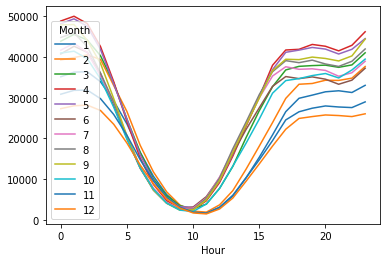

In [84]:
Month_hour =  df.groupby(by=['Hour','Month']).count()['transaction_type'].unstack()
Month_hour.plot()

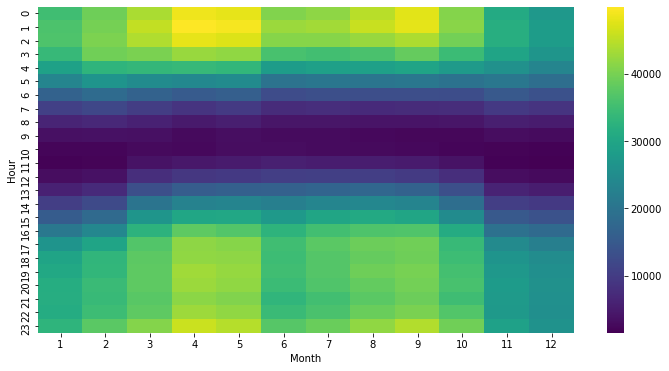

In [22]:
plt.figure(figsize=(12,6))
sns.heatmap(Month_hour,cmap='viridis')

Mutual Connections

In [220]:
def find_connections(user_id):
    # 1st Degree Connections
    connections1 = []
    # 2nd Degree Connections
    connections2 = []
    # 3rd Degree Connections
    connections3 = []
    for(idx,row) in testing_df.iterrows():
        # Find connections in user1 column, and append to 1st degree 
        if(row.loc['user1'] == user_id):
            count = 0
            # Only append if there are no duplicates
            for check in connections1:
                if(row.loc['user2'] == check):
                    count+=1
            if(count==0):
                connections1.append(row.loc['user2'])
        # Find connections in user2 column, and append to 1st degree
        if(row.loc['user2'] == user_id):
            count = 0
            for check in connections1:
                if(row.loc['user1'] == check):
                    count+=1
            if(count==0):
                connections1.append(row.loc['user1'])
        #Find potential connections from 1st degree connections, append to 2nd degree
        for c in connections1:
            count = 0
            # Find connections in user1 column
            if(row.loc['user1'] == c):
                # Avoids adding own user as a connection
                if(row.loc['user2']!= user_id):
                    # Check for duplicate connections
                    for check in connections2:
                        if(row.loc['user2'] == check):
                            count+=1
                    for check in connections1:
                        if(row.loc['user2'] == check):
                            count+=1
                    if(count==0):        
                        connections2.append(row.loc['user2'])
            # Find connections in user2 column 
            if(row.loc['user2'] == c):
                count = 0
                # Avoids adding own user as a connection
                if(row.loc['user1']!= user_id):
                    # Check for duplicate connections
                    for check in connections2:
                        if(row.loc['user1'] == check):
                            count+=1
                    for check in connections1:
                        if(row.loc['user1'] == check):
                            count+=1
                    if(count==0):
                        connections2.append(row.loc['user1'])
        # Find connections from 2nd degree connections, appending for connection 3
        for c in connections2:
            count_dup = 0
            # Find connections in user1 column
            if(row.loc['user1'] == c):
                # Avoids adding own user as a connection
                if(row.loc['user2']!= user_id):
                    # Checks for already existing connections from 1st Degree
                    for check in connections1:
                        if(row.loc['user2'] == check):
                            count_dup+=1
                    # Check for duplicates within 3rd degree list
                    for check in connections3:
                        if(row.loc['user2'] == check):
                            count_dup+=1
                    if(count_dup==0):
                        connections3.append(row.loc['user2'])
                    
            # Find connections in user2 column 
            if(row.loc['user2'] == c):
                count = 0
                # Avoids adding own user as a connection
                if(row.loc['user1']!= user_id):
                    # Checks for duplicate connections
                    for check in connections1:
                        if(row.loc['user1'] == check):
                            count+=1  
                    # Check for duplicates within 3rd degree list
                    for check in connections3:
                        if(row.loc['user1'] == check):
                            count+=1
                    # Only append if there are no duplicates found in either list
                    #print(count)
                    if(count==0):
                        connections3.append(row.loc['user1'])
                        
    # Removing duplicate connections from all degrees
    for c1 in connections1:
        for c2 in connections2:
            if(c1 == c2):
                connections2.remove(c2)
        for c3 in connections3:
            if(c1 == c3):
                connections3.remove(c3)
    
    for c2 in connections2:
        for c3 in connections3:
            if(c2 == c3):
                connections3.remove(c3)
    
    print("User " + str(user_id) + " connections are: " + "1st Degree"+str(connections1) + ", 2nd Degree" +str(connections2)
         +", 3rd Degree" + str(connections3)) 
    

Adding some dummy data to test connection algorithm

In [34]:
testing_df = pd.DataFrame(df.head(30))

In [38]:
testing_df.head()

,user1,user2,transaction_type,datetime,description,Hour,Month,Day of Week
0,1218774,1528945,payment,2015-11-27 02:48:19,Uber,2,11,Fri
1,5109483,4782303,payment,2015-06-17 04:37:04,Costco,4,6,Wed
2,4322148,3392963,payment,2015-06-19 00:05:31,Sweaty balls,0,6,Fri
3,469894,1333620,charge,2016-06-03 16:34:13,🎥,16,6,Fri
4,2960727,3442373,payment,2016-05-29 16:23:42,⚡,16,5,Sun


Inserting dummy data from above

In [39]:
testing_df = testing_df.append(pd.DataFrame([[1218774, 1111111 , 'n','n','n','n','n','n']],columns = testing_df.columns), ignore_index=True)

In [40]:
testing_df.head(32)

,user1,user2,transaction_type,datetime,description,Hour,Month,Day of Week
0,1218774,1528945,payment,2015-11-27 02:48:19,Uber,2,11,Fri
1,5109483,4782303,payment,2015-06-17 04:37:04,Costco,4,6,Wed
2,4322148,3392963,payment,2015-06-19 00:05:31,Sweaty balls,0,6,Fri
3,469894,1333620,charge,2016-06-03 16:34:13,🎥,16,6,Fri
4,2960727,3442373,payment,2016-05-29 16:23:42,⚡,16,5,Sun
5,3977544,2709470,payment,2016-09-29 15:12:07,Chipotlaid,15,9,Thu
6,3766386,4209061,payment,2016-05-20 03:31:15,kitchen counter,3,5,Fri
7,730075,804466,payment,2016-05-25 21:46:45,Food,21,5,Wed
8,5221751,4993533,payment,2016-07-14 15:53:49,Zaxby,15,7,Thu
9,6843582,7308338,payment,2016-08-31 03:32:46,Fan sucks,3,8,Wed


In [49]:
testing_df = testing_df.append(pd.DataFrame([[1234567,1528945,'n','n','n','n','n','n']],columns = testing_df.columns), ignore_index=True)

In [52]:
testing_df = testing_df.append(pd.DataFrame([[1111111,123,'n','n','n','n','n','n']],columns = testing_df.columns), ignore_index=True)

In [42]:
testing_df = testing_df.append(pd.DataFrame([[1234567,2222222,'n','n','n','n','n','n']],columns = testing_df.columns), ignore_index=True)

In [43]:
testing_df = testing_df.append(pd.DataFrame([[1218774,2323,'n','n','n','n','n','n']],columns = testing_df.columns), ignore_index=True)

In [94]:
testing_df.head(40)

,user1,user2,transaction_type,datetime,description,Hour,Month,Day of Week
0,1218774,1528945,payment,2015-11-27 02:48:19,Uber,2,11,Fri
1,5109483,4782303,payment,2015-06-17 04:37:04,Costco,4,6,Wed
2,4322148,3392963,payment,2015-06-19 00:05:31,Sweaty balls,0,6,Fri
3,469894,1333620,charge,2016-06-03 16:34:13,🎥,16,6,Fri
4,2960727,3442373,payment,2016-05-29 16:23:42,⚡,16,5,Sun
5,3977544,2709470,payment,2016-09-29 15:12:07,Chipotlaid,15,9,Thu
6,3766386,4209061,payment,2016-05-20 03:31:15,kitchen counter,3,5,Fri
7,730075,804466,payment,2016-05-25 21:46:45,Food,21,5,Wed
8,5221751,4993533,payment,2016-07-14 15:53:49,Zaxby,15,7,Thu
9,6843582,7308338,payment,2016-08-31 03:32:46,Fan sucks,3,8,Wed


In [221]:
find_connections(1218774)

User 1218774 connections are: 1st Degree[1528945, 1111111, 2323], 2nd Degree[1234567, 123], 3rd Degree[]


In [222]:
find_connections(1528945)

User 1528945 connections are: 1st Degree[1218774, 1234567], 2nd Degree[1111111, 2323], 3rd Degree[123]


In [76]:
testing_year_column = testing_df.head(30)

In [77]:
testing_year_column['Year'] = pd.DatetimeIndex(testing_year_column['datetime']).year  

C:\Users\jeff\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [200]:
Month_year =df.groupby(by=['Year','Month']).count()['transaction_type'].unstack()
Month_year_data = pd.DataFrame(Month_year, index=None, columns = None)

In [201]:
Month_year_data.head()

Month,1,2,3,4,5,6,7,8,9,10,11,12
Year,,,,,,,,,,,,
2011,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,4.0
2012,NaN,NaN,1.0,202.0,287.0,294.0,325.0,529.0,678.0,825.0,1039.0,1207.0
2013,1585.0,1948.0,2551.0,3224.0,3729.0,3717.0,4897.0,6738.0,9282.0,11934.0,13915.0,14968.0
2014,20313.0,24059.0,32806.0,37520.0,42871.0,41881.0,46978.0,58956.0,73982.0,87141.0,92854.0,94408.0
2015,117720.0,132171.0,165681.0,179204.0,194956.0,167716.0,183280.0,217946.0,267505.0,305791.0,302364.0,300824.0


In [202]:
Month_year_data['Year'] = Month_year_data.index

In [212]:
Month_year_data.drop(index=2011, axis=0, inplace = True)

In [213]:
Month_year_data.drop(index=2012, axis=0, inplace = True)

In [217]:
Month_year_data

Month,1,2,3,4,5,6,7,8,9,10,11,12,Year
Year,,,,,,,,,,,,,
2013,1585.0,1948.0,2551.0,3224.0,3729.0,3717.0,4897.0,6738.0,9282.0,11934.0,13915.0,14968.0,2013
2014,20313.0,24059.0,32806.0,37520.0,42871.0,41881.0,46978.0,58956.0,73982.0,87141.0,92854.0,94408.0,2014
2015,117720.0,132171.0,165681.0,179204.0,194956.0,167716.0,183280.0,217946.0,267505.0,305791.0,302364.0,300824.0,2015
2016,365801.0,408218.0,441496.0,482011.0,456274.0,384674.0,387026.0,361737.0,309637.0,178357.0,42203.0,NaN,2016


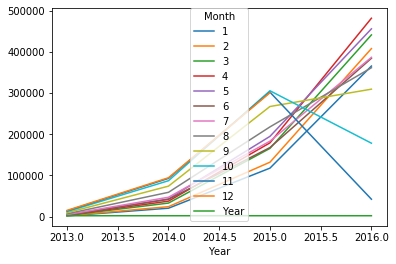

In [215]:
Month_year_data.plot()